In [ ]:
!pip install torchvision ipyplot txtai[all] datasets > /dev/null

In [23]:
import glob
import ipyplot
from PIL import Image

from txtai.embeddings import Embeddings
from txtai.pipeline import Caption

![image.png](https://github.com/openai/CLIP/raw/main/CLIP.png)

CLIP (Contrastive Language-Image Pre-Training) is a neural network trained on a variety of (image, text) pairs. It can be instructed in natural language to predict the most relevant text snippet, given an image, without directly optimizing for the task, similarly to the zero-shot capabilities of GPT-2 and 3.


There are open source models available that come close to above models, which will be used in this discussion

https://github.com/mlfoundations/open_clip

https://huggingface.co/docs/transformers/model_doc/clip


kaggle datasets download -d paramaggarwal/fashion-product-images-small

Fashion Product Images (Small)
44000 products with category labels and images.

Thanks to the dataset maintained by ashraq in Huggingface Hub.
    "ashraq/fashion-product-images-small"

In [ ]:
from datasets import load_dataset

# load the dataset from huggingface datasets hub
image_data = load_dataset(
    "ashraq/fashion-product-images-small",
    split="train"
)

In [8]:
image_data

Dataset({
    features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
    num_rows: 44072
})

In [9]:
#We want image, and the caption that is already provided to it
given_captions = image_data["productDisplayName"]
images = image_data['image']

In [27]:
given_captions[0]

'Turtle Check Men Navy Blue Shirt'

/usr/local/lib/python3.9/dist-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



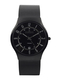
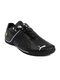


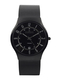
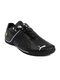

In [25]:
ipyplot.plot_images(images[9:11],given_captions[9:11],
                    img_width=75,force_b64=True)

In [10]:
image_data[0]

{'id': 15970,
 'gender': 'Men',
 'masterCategory': 'Apparel',
 'subCategory': 'Topwear',
 'articleType': 'Shirts',
 'baseColour': 'Navy Blue',
 'season': 'Fall',
 'year': 2011.0,
 'usage': 'Casual',
 'productDisplayName': 'Turtle Check Men Navy Blue Shirt',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7FCEC18806A0>}

### making the data ready to embed...

In [74]:
fashion_data = []

for img in image_data:
  # Add image object along with image metadata
  fashion_data.append((img['id'], {"object": img['image'], 
                             "format": img['image'].format, 
                             "width": img['image'].width, 
                             "height": img['image'].height, 
                             "caption": img['productDisplayName']
                             }, None))

In [4]:
fashion_index = Embeddings({"method": "sentence-transformers", 
                         "path": "sentence-transformers/clip-ViT-B-32", 
                         "content": True, 
                         "objects": "image"})

In [76]:
!rm -fR fashion_data_index

In [77]:
fashion_index.index(fashion_data[:1000])

In [78]:
fashion_index.save("fashion_data_index")

In [5]:
fashion_index.load("fashion_data_index")

In [ ]:
#searching with the image

In [ ]:
fashion_index.search("select * from txtai limit 5")

In [40]:
img_srch_result = fashion_index.search(image_data[0]['image'])

In [41]:
img_srch_result

[{'id': '15970', 'text': None, 'score': 1.0},
 {'id': '8741', 'text': None, 'score': 0.9695494174957275},
 {'id': '16530', 'text': None, 'score': 0.94101482629776}]

In [45]:
result_data = fashion_index.search("select * from txtai where id = '15970' or id = '8741' ")

In [46]:
result_data

[{'indexid': 0,
  'id': '15970',
  'text': None,
  'tags': None,
  'entry': '2023-04-24 02:30:38.876655',
  'data': '{"format": "JPEG", "width": 60, "height": 80, "caption": "Turtle Check Men Navy Blue Shirt"}',
  'object': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7FCED711CCD0>,
  'score': None},
 {'indexid': 379,
  'id': '8741',
  'text': None,
  'tags': None,
  'entry': '2023-04-24 02:30:38.876655',
  'data': '{"format": "JPEG", "width": 60, "height": 80, "caption": "Indigo Nation Men Checks Shirt Navy Blue Shirts"}',
  'object': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7FCED711C070>,
  'score': None}]

/usr/local/lib/python3.9/dist-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



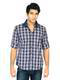
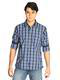


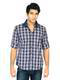
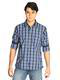

In [50]:
srch_obj = [result['object'] for result in result_data]
ipyplot.plot_images(srch_obj,
                    img_width=75,force_b64=True)

In [20]:
#searching the text captions...

search_result = fashion_index.search("""select object, 
                  caption from txtai 
                  where similar('women tops',5)""")

In [21]:
fashion_obj = [result['object'] for result in search_result]
fashion_capts = [result['caption'] for result in search_result]


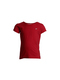
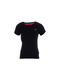
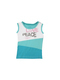


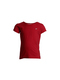
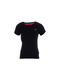
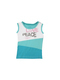

In [22]:
ipyplot.plot_images(fashion_obj,fashion_capts,
                    img_width=75,force_b64=True)